<a href="https://colab.research.google.com/github/almeidaferreiraisabela/datascience/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de Dados e Boas Práticas**
    Aluno: Isabela de Almeida Ferreira

**1. Definição do Problema**

O dataset que será utilizado neste projeto é o Netflix Userbase Dataset, que é uma amostra da base de usuários da Netflix, que apresenta diversos aspectos sobre a assinatura e o consumidor da plataforma.
Cada linha representa um usuário único, identificado por seu ID. O conjunto de dados inclui informações como o tipo de assinatura do usuário (Básico, Padrão ou Premium), a receita mensal gerada pela assinatura, a data em que ingressou na Netflix (Data de adesão), a data do último pagamento e o país em que estão localizados entre outros dados.


 Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset/data

**Informações sobre os atributos:**

User ID - ID do usuário

Subscription Type - Tipo de assinatura (Básico, Padrão ou Premium)

Monthly Revenue - Receita Mensal gerada pelo usuário (USD)

Join Date - Data de adesão da plataforma

Last Payment Date - Data do último pagamento

Country - País no qual o usuário informa

Age - Idade do usuário

Gender - Gênero do usuário (Feminino e Masculino)

Device - O dispositivo usado para acessar a plataforma (Smart TV, Laptop, entre
outros)

Plan Duration - Tempo de duração do plano


# **2. Carga de Dados**

Nesse passo, iremos utilizar o pacote Pandas (Python Data Analysis Library), no primeiro momento acionando os pacotes necessários por meio do comando *import*.
Depois iremos importar o arquivo em csv online.

Após os passos abaixo, iremos iniciar uma análise exploratória dos dados.

# **3. Análise de Dados**

**3.1 - Estatísticas descritivas**

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd

# Importa o arquivo CSV pela URL de importação
url = "https://raw.githubusercontent.com/almeidaferreiraisabela/datascience/main/Netflix%20Userbase.csv"

# Identifica as colunas
colunas = ['user id','subscription type','monthly revenue','join date','last payment date','country','age','gender','device','plan duration']

# Lê o arquivo pelas as colunas informadas na linha acima
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

dataset.head()

,user id,subscription type,monthly revenue,join date,last payment date,country,age,gender,device,plan duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
#Estatísticas descritivas
# Mostra a quantidade de linhas e colunas do dataset
print(dataset.shape)

(2500, 10)


In [ ]:
# Mostra as informações do dataset
# Esse passo é importante para entender a estrutura do conjunto de dados, qual tipo de dado em cada coluna e se há missings na tabela
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user id            2500 non-null   int64 
 1   subscription type  2500 non-null   object
 2   monthly revenue    2500 non-null   int64 
 3   join date          2500 non-null   object
 4   last payment date  2500 non-null   object
 5   country            2500 non-null   object
 6   age                2500 non-null   int64 
 7   gender             2500 non-null   object
 8   device             2500 non-null   object
 9   plan duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None


In [ ]:

# Verifica o formato de dataset de cada atributo
dataset.dtypes

user id               int64
subscription type    object
monthly revenue       int64
join date            object
last payment date    object
country              object
age                   int64
gender               object
device               object
plan duration        object
dtype: object

In [ ]:
# Quadro resumo  das estatísticas do dataset (contagem, média, desvio padrão, mínimo, máximo e os quartis)
#lembrando que aplica-se apenas para as variáveis numéricas, as demais (object), não entram nessas estatíticas
dataset.describe()

,user id,monthly revenue,age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


**3.2 - Visualizações Unimodais**

Os gráficos de visualização unimodais exibem apenas uma única moda. Com isso, mostram uma tendência central, e destacam os pontos que se concetram em torno desse valor determinado.

O gráfico a seguir é um histograma, uma representação visual da distribuição de frequência em um conjunto de dados. No eixo vertical (Y), as alturas das barras indicam as frequências ou contagens de observações em intervalos específicos. No eixo horizontal (X), encontram-se os intervalos, também chamados de "bins". Este tipo de gráfico oferece uma visão clara e intuitiva da concentração de dados em diferentes faixas, permitindo análises detalhadas da distribuição dos valores.

Nesta análise em específico, podemos concluir que temos mais assinaturas que custam cerca de 12 USD e clientes com mais de 40 e 45 anos.

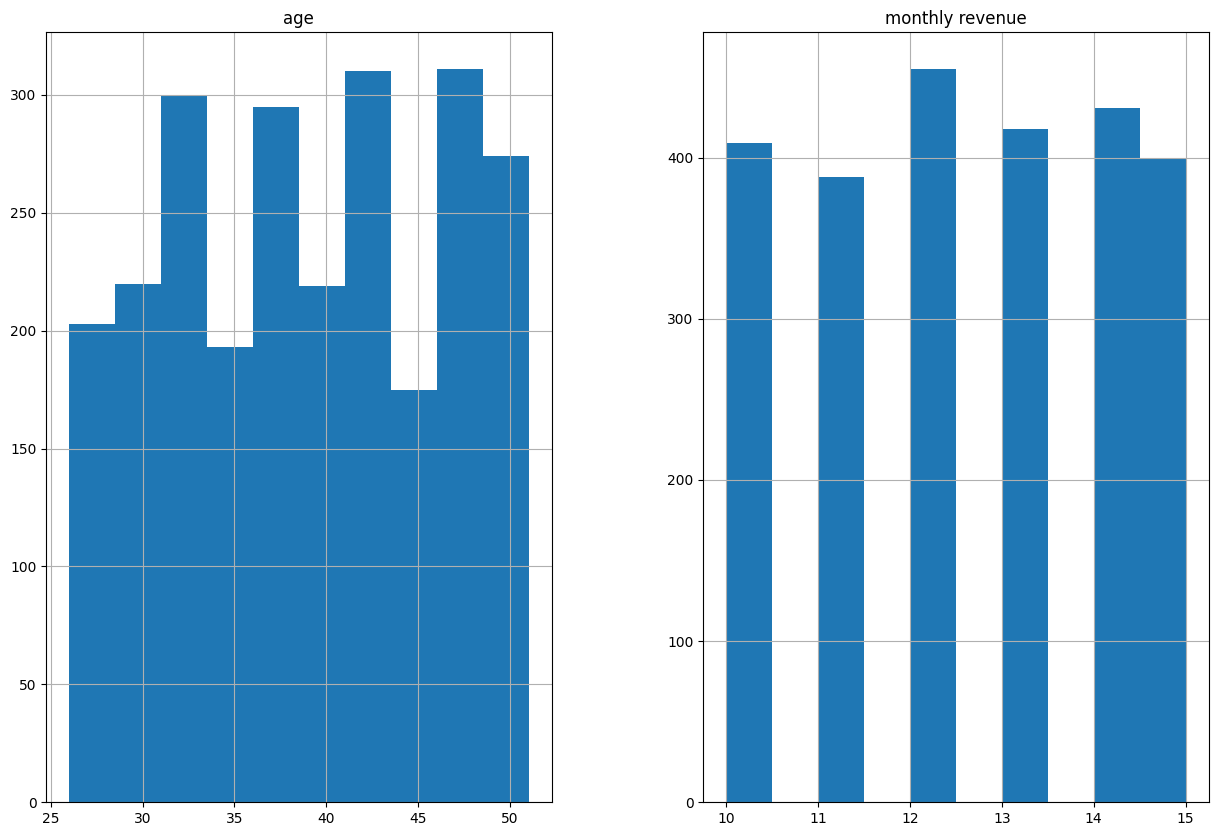

In [ ]:
colunas_selecionadas = dataset[['age', 'monthly revenue']]

# Histograma para colunas específicas
colunas_selecionadas.hist(figsize=(15, 10))
plt.show()

No gráfico a seguir, apresentamos uma visualização de colunas que relaciona a variável "Receita Mensal" (monthly revenue) com a variável "País" (country). Essa representação gráfica oferece insights sobre quais países são os principais geradores de receita mensal.

Ao interpretar o gráfico, observamos que os Estados Unidos e a Espanha lideram como os principais contribuintes para a receita, seguidos pelo Canadá. Em um contexto mais específico, como em um estudo direcionado para decidir quais programas, filmes ou séries promover para maximizar a rentabilidade da plataforma, essa análise pode ser valiosa para identificar as regiões mais lucrativas e orientar estratégias de produção e promoção.

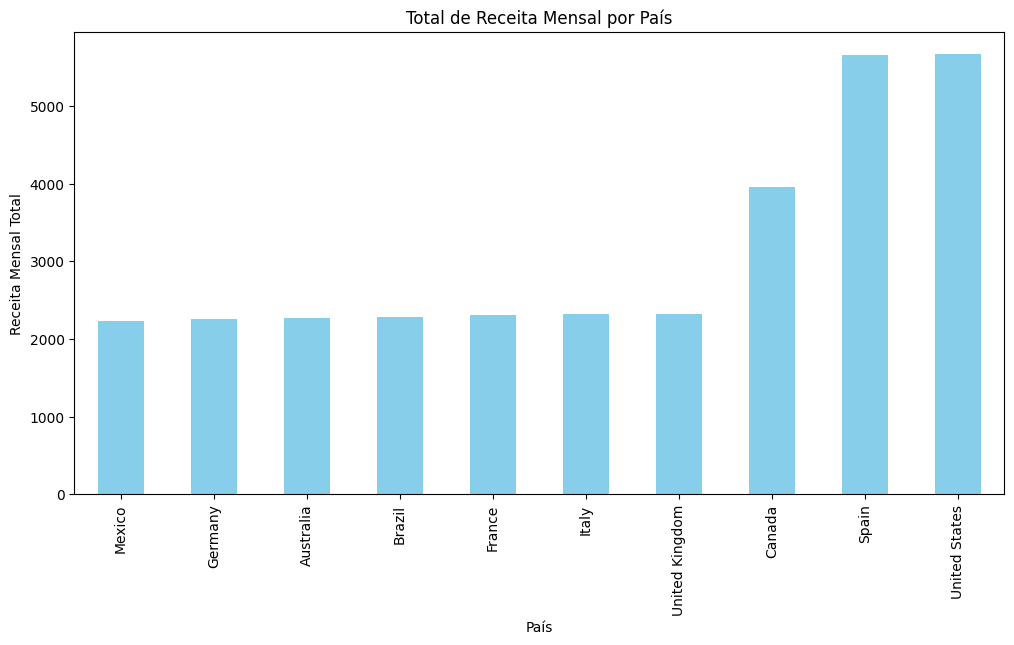

In [ ]:
# Crie um gráfico de colunas
plt.figure(figsize=(12, 6))
dataset.groupby('country')['monthly revenue'].sum().sort_values().plot(kind='bar', color='skyblue')
plt.title('Total de Receita Mensal por País')
plt.xlabel('País')
plt.ylabel('Receita Mensal Total')
plt.show()

Agora, reproduziremos o gráfico considerando a variável 'gênero' ('gender') dos clientes. A cor foi ajustada, proporcionando uma tonalidade escolhida que pode ser integrada facilmente a uma apresentação. Além disso, adicionamos Rótulos de Dados para fornecer informações visuais mais precisas. Anteriormente, a identificação da predominância entre os gêneros não era intuitiva. Com essa adição, percebemos que há uma ligeira maioria de mulheres na base, enquanto a diferença em relação aos homens é pequena. Essa melhoria na visualização facilita a interpretação dos dados sobre a distribuição de gênero.

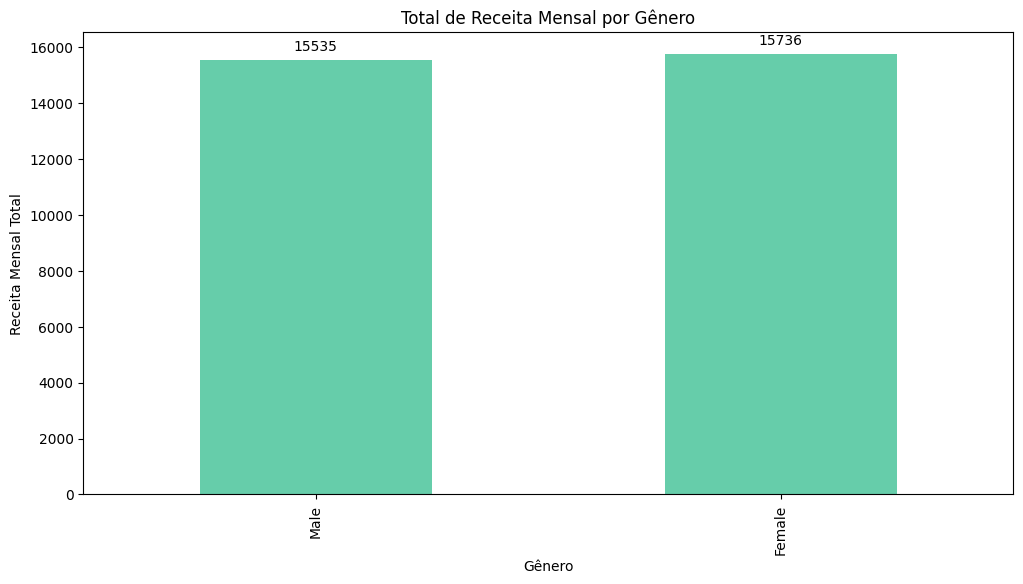

In [ ]:
#Crie um gráfico de colunas
plt.figure(figsize=(12, 6))
ax = dataset.groupby('gender')['monthly revenue'].sum().sort_values().plot(kind='bar', color='mediumaquamarine')
plt.title('Total de Receita Mensal por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Receita Mensal Total')

# Adicione rótulos de dados
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

O próximo gráfico a ser apresentado é o gráfico de Densidade, também conhecido como Density Plot, que representa a distribuição de probabilidade de um conjunto de dados contínuo. Neste gráfico, a área total sob a curva é normalizada para ser igual a 1, refletindo a probabilidade total associada aos dados.

Ao contrário do histograma convencional, o gráfico de Densidade conecta os pontos de dados de forma contínua, proporcionando uma visualização suave. Essa abordagem facilita a identificação de formas gerais da curva, modas e assimetrias na distribuição, tornando-o uma ferramenta valiosa para análise estatística e interpretação mais refinada da distribuição dos valores.

Quando aplicamos esse gráfico na nossa base, podemos identificar que o Monthly Revenue não ultrapassa 20 USD, pois nesse espaço amostral não há assinaturas com o valor superior a este. Em uma análise específica, pode ajudar a concluir se existe ou não elasticidade em uma possível mudança de valor.

Já na idade, identificamos que a maior concentração na base é entre 30 e 50 anos, o que em uma análise específica pode ajudar a entender qual tipo de programação é mais atrativa ter no portfólio.

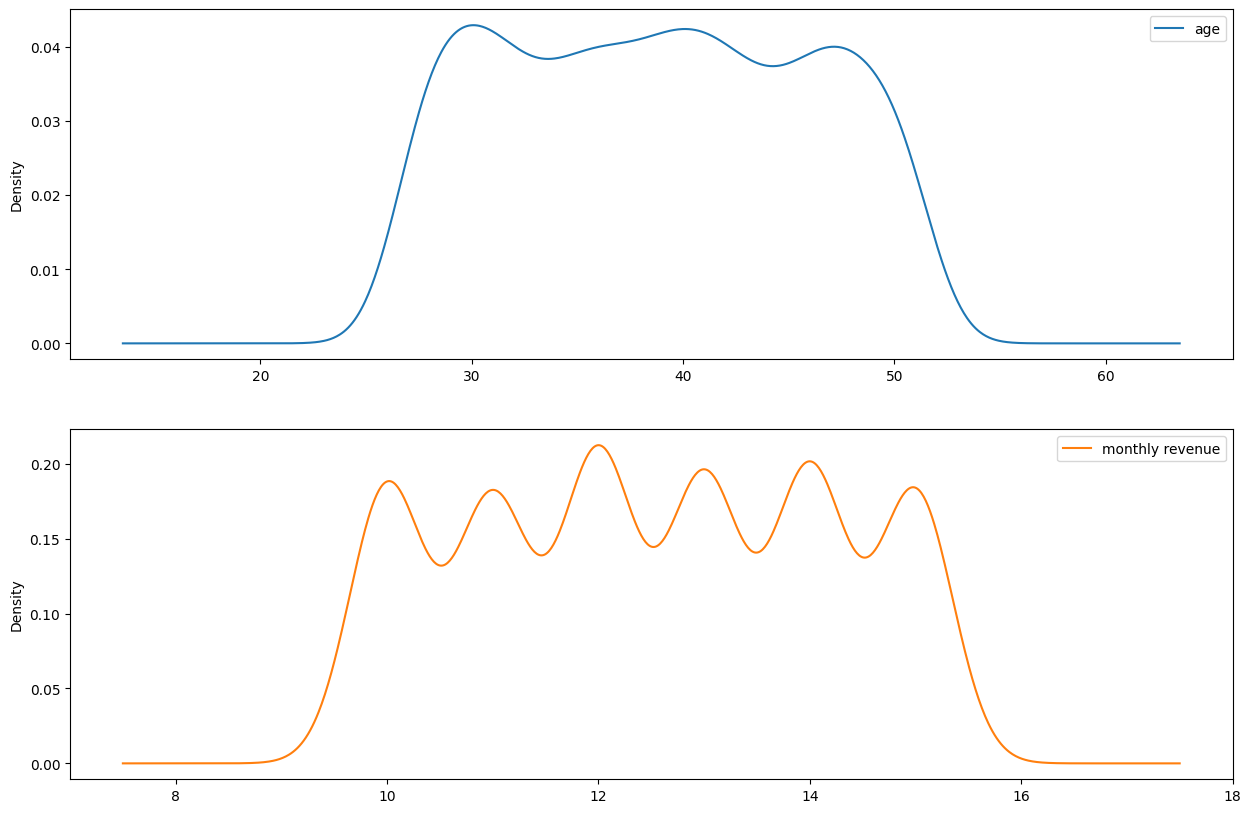

In [ ]:
# Density Plot
atributos_selecionados = dataset[['age', 'monthly revenue']]

# Crie um gráfico de densidade para os atributos selecionados
atributos_selecionados.plot(kind='density', subplots=True, sharex=False, layout=(len(atributos_selecionados.columns), 1), figsize=(15, 10))
plt.show()

O próximo gráfico a ser empregado é o Boxplot, uma representação visual da distribuição estatística de um conjunto de dados. Este gráfico é composto por uma "caixa" que abrange o intervalo interquartil, englobando a maioria dos dados. No centro da caixa, geralmente, encontra-se uma linha que representa a mediana ou o segundo quartil (Q2), dividindo o conjunto de dados ao meio.

As extremidades da caixa, conhecidas como "bigodes" ou "whiskers", indicam a dispersão dos dados além do intervalo interquartil. Valores que se encontram fora dessas marcações são considerados outliers, destacando pontos significativamente distantes da maioria dos dados.

O Boxplot é uma ferramenta eficaz para visualizar a variabilidade, identificar a presença de valores atípicos e compreender a simetria em conjuntos de dados, sendo amplamente utilizado em análises estatísticas descritivas e comparações entre diferentes grupos.


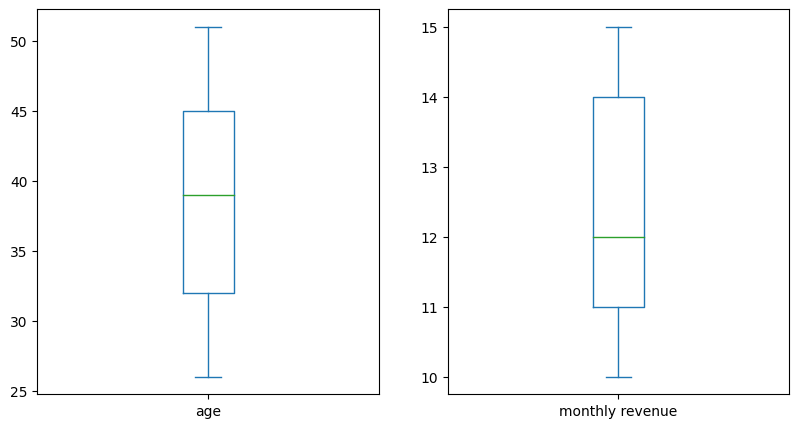

In [ ]:

# Boxplot
# Selecione as variáveis desejadas
variaveis_selecionadas = dataset[['age', 'monthly revenue']]

# Crie um boxplot para as variáveis selecionadas
variaveis_selecionadas.plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 5))
plt.show()

**3.3 Visulizações Multimodais**

Ao contrário dos gráficos apresentados na seção 3.2, as visualizações multimodais destacam múltiplas modas, evidenciando dois ou mais pontos principais distintos. Essa abordagem é crucial para compreender e interpretar dados que exibem diferentes agrupamentos ou tendências, sinalizando a presença de subpopulações que exercem influência sobre os dados.

Iniciaremos examinando uma Tabela de Correlação. Do ponto de vista estatístico, a correlação é uma métrica que descreve a relação entre duas variáveis. Seu valor varia de -1 a 1: quanto mais próximo de -1, indica uma relação inversamente proporcional; quanto mais próximo de 1, indica uma relação diretamente proporcional com forte correlação. Contudo, um coeficiente próximo de 0 ou seu valor exato sugere a ausência de uma forte correlação entre as variáveis.

Nos casos analisados a seguir, ao considerar a relação entre variáveis numéricas ou entre variáveis numéricas e não numéricas, concluímos que não há uma correlação direta entre essas variáveis. Em outras palavras, para a base de dados utilizada, a Tabela de Correlação não se mostra útil.

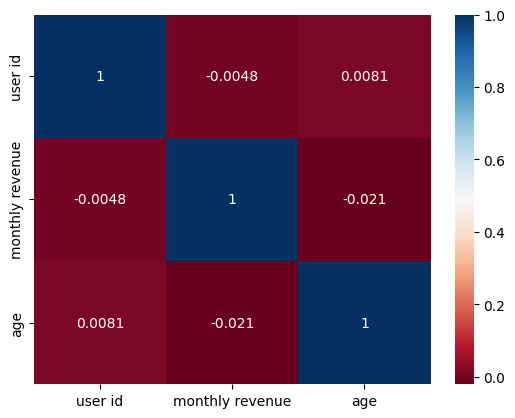

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

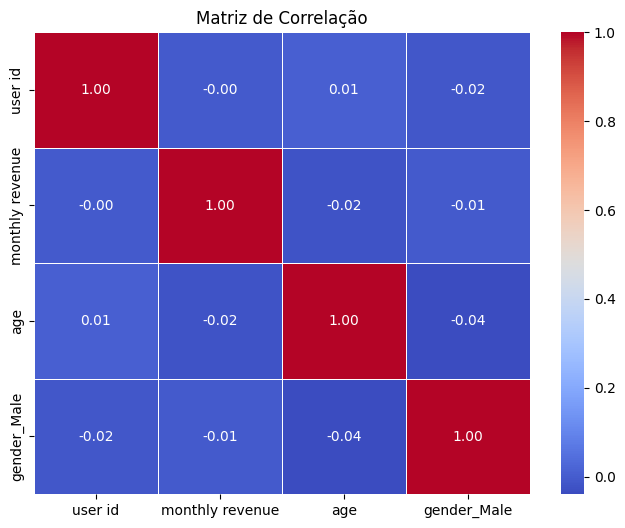

In [ ]:
df = pd.DataFrame(dataset)

# Convertendo a variável 'gender' para um formato numérico (por exemplo, usando one-hot encoding)
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Criando um mapa de calor com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

O próximo gráfico é o Scatter Plot, ou Gráfico de Dispersão é a representação visual de um conjunto de dados no plano cartesiano (x,y). Ele exibe a relação entre duas variáveis numéricas.

Como já vimos anteriormente, não haverá relação entre as variáveis numéricas neste conjunto de dados, mas iremos executar o programa.

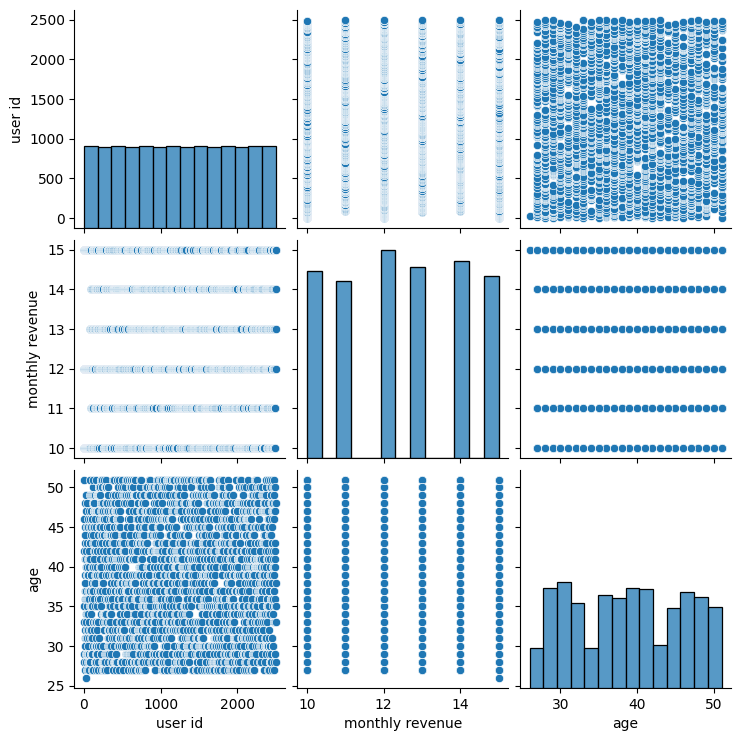

In [ ]:
# Scatter Plot com Seaborn
sns.pairplot(dataset)

# **4. Pré-processamento de dados**
Essa fase desempenha um papel fundamental para garantir que a base de dados utilizada esteja devidamente preparada. Esse processo envolve a limpeza, transformação e organização dos dados, adequando-os tanto para análise quanto para o treinamento.

Cada análise ou treinamento demanda abordagens distintas, assim como diferentes estruturas de dados necessitam de tratamentos específicos.

A etapa de pré-processamento de dados pode ser subdividida em várias subetapas, dependendo das necessidades específicas, mas as principais são:

**4.1 - Limpeza de Dados:**

Esta fase inclui o tratamento de valores ausentes, podendo envolver a eliminação, remoção ou interpolação de dados. Também abrange a identificação e tratamento de outliers, caso esses valores atípicos impactem a compreensão dos dados. No caso da nossa base de dados, não será necessário efetuar nenhum tratamento, pois trata-se de uma amostra de uma base já processada.

**4.2 - Separação em Conjunto de Treino e Conjunto de Teste:**

Essencial quando o conjunto de dados é utilizado para construir modelos, essa etapa requer a separação de um conjunto para treinamento e outro para teste. O conjunto de teste, composto por cerca de 20% dos dados, não é usado na estruturação do modelo, servindo apenas para avaliar a acurácia do modelo gerado pela base de teste. Embora não seja necessário aplicar essa etapa de tratamento no nosso caso, é uma prática recomendada.

**4.3 - Outros Tratamentos:**

Além disso, existem outros tratamentos relevantes, como o **Tratamento Categórico de Dados**, que transforma variáveis categóricas em vetores binários e codifica rótulos, atribuindo valores numéricos às categorias. Destaca-se também o **Manejo de Dados Temporais**, que envolve a reamostragem para ajustar a granularidade dos dados temporais, juntamente com a extração de características temporais, capturando aspectos específicos de datas e horários.

# **Conclusão**

